# ‚≠êÔ∏è ÌîÑÎ°úÏ†ùÌä∏: CAMÏùÑ ÎßåÎì§Í≥† ÌèâÍ∞ÄÌï¥ Î≥¥Ïûê

Ïù¥Î≤à ÏãúÍ∞ÑÏóêÎäî CAM(Class Activation Map)ÏùÑ ÏñªÍ∏∞ ÏúÑÌïú Î∞©Î≤ï Ï§ë Í∏∞Î≥∏ CAMÍ≥º Grad-CAMÏùÑ Íµ¨ÌòÑÌï¥Î≥¥Í≥† Ïù¥Î•º ÏãúÍ∞ÅÌôîÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Í∑∏Î¶¨Í≥† CAMÏùÑ ÌôúÏö©Ìï¥ÏÑú Î¨ºÏ≤¥Ïùò ÏúÑÏπòÎ•º Ï∞æÎäî object detectionÏùÑ ÏàòÌñâÌïòÍ≥† Ïù¥Î•º Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµêÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

## ‚úÖ Ïã§ÏäµÎ™©Ìëú
* Classification modelÎ°úÎ∂ÄÌÑ∞ CAMÏùÑ ÏñªÏñ¥ÎÇº Ïàò ÏûàÎã§.
* CAMÏúºÎ°ú Î¨ºÏ≤¥Ïùò ÏúÑÏπòÎ•º Ï∞æÏùÑ Ïàò ÏûàÎã§.
* CAMÏùÑ ÏãúÍ∞ÅÌôî ÎπÑÍµêÌï† Ïàò ÏûàÎã§.

## ‚úÖ ÌïôÏäµ ÎÇ¥Ïö©
* CAM, Grad-CAMÏö© Î™®Îç∏ Ï§ÄÎπÑÌïòÍ∏∞
* CAM
* Grad-CAM
* Detection with CAM

## Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑÌïòÍ∏∞    

-----------


[standard_dogs](https://www.tensorflow.org/datasets/catalog/stanford_dogs) Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.  

* 20 Ï¢ÖÏùò Í∞úÎ•º ÏÇ¨ÏßÑÏúºÎ°ú ÌåêÎ≥ÑÌïòÎäî Î∂ÑÎ•ò Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú, ÎùºÎ≤®Ïù¥ ÏúÑÏπò Ï†ïÎ≥¥Ïù∏ **Î∞îÏö¥Îî© Î∞ïÏä§(bounding box) Ï†ïÎ≥¥Î•º Ìè¨Ìï®**ÌïòÍ≥† ÏûàÏäµÎãàÎã§.

**Î®ºÏ†Ä ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î∂àÎü¨Ïò§Í≤†ÏäµÎãàÎã§!**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image

**GPUÌôòÍ≤ΩÏùÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.**

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

tfds.load()Î•º ÌôúÏö©Ìï¥ÏÑú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìú ÌïòÍ≤†ÏäµÎãàÎã§.

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

**tfds.show_examples() Î•º ÌÜµÌï¥ÏÑú Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¥ÎûòÏä§ÏôÄ Í∑∏ Ïù∏Îç±Ïä§(index)Î•º ÌôïÏù∏**

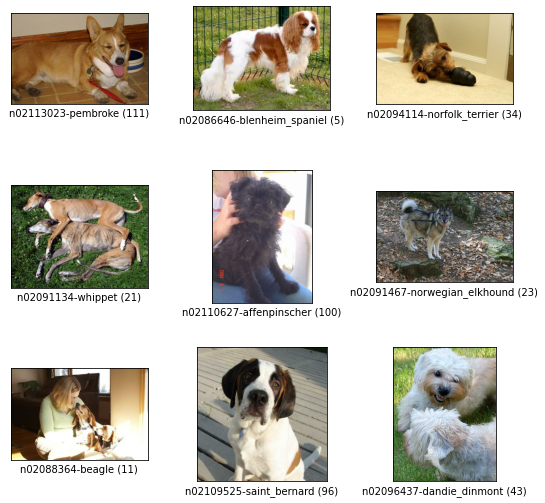

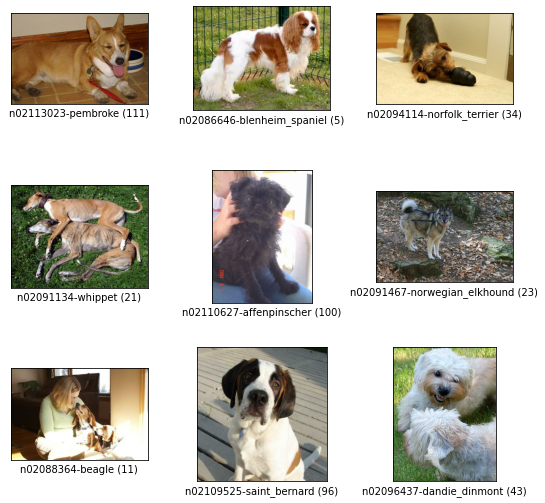

In [4]:
tfds.show_examples(ds_train, ds_info)

**ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ÏÖãÎèÑ ÎààÏúºÎ°ú ÌôïÏù∏**

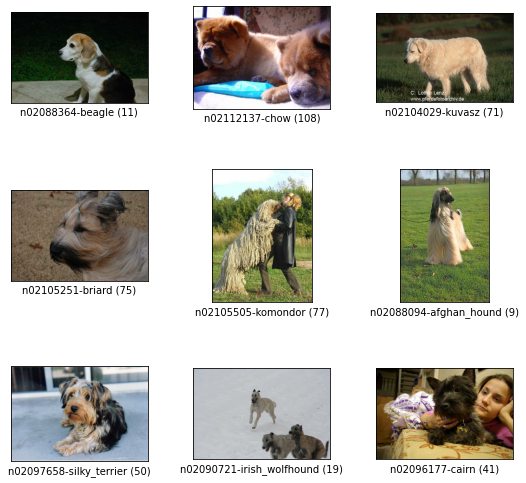

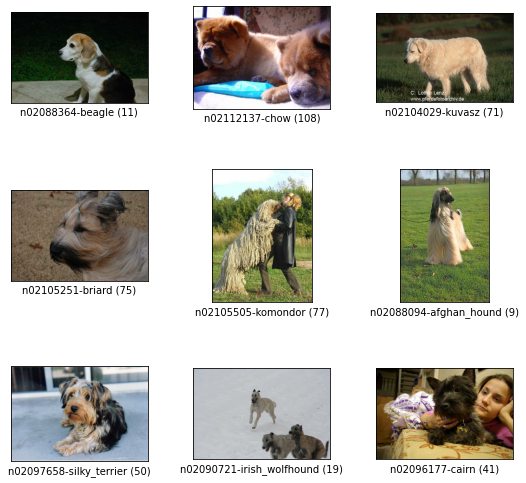

In [5]:
tfds.show_examples(ds_test, ds_info)

## Î¨ºÏ≤¥Ïùò ÏúÑÏπòÏ†ïÎ≥¥

Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î©îÌÉÄ Ï†ïÎ≥¥Ïù∏ df_infoÎ•º Ï°∞ÌöåÌï¥ featuresÍ∞Ä Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [6]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
    }),
})

üîº bbox(Î∞îÏö¥Îî© Î∞ïÏä§)Îäî Î¨ºÏ≤¥Ïùò ÏúÑÏπòÎ•º ÏÇ¨Í∞ÅÌòï ÏòÅÏó≠ÏúºÎ°ú ÌëúÍ∏∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§. ÏúÑÏóêÏÑú ÌôïÏù∏Ìïú Î∞îÎ°úÎäî BBoxFeatureÏù¥ÎùºÎäî ÌÉÄÏûÖÏúºÎ°ú Ï†ïÏùòÎêòÏñ¥ÏûàÏäµÎãàÎã§.

### ‚ñ∂Ô∏è Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÌëúÏãúÌïòÎäî Î∞©Î≤ïÎì§

----------------------

Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÎùºÎ≤®ÎßÅÌïòÎäî Î∞©Î≤ïÏùÄ ÏïÑÏ£º Îã§ÏñëÌï©ÎãàÎã§. Í∑∏ Ï§ë Ï£ºÎ°ú ÏÇ¨Ïö©ÎêòÎäî Î∞©Î≤ïÏùÄ 'xywh' ÎòêÎäî 'minmax'Î°ú ÌëúÍ∏∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.    

* **'xywh'** Îäî Î∞îÏö¥Îî©Î∞ïÏä§ Ï§ëÏã¨Ï†êÏùÑ x, yÎ°ú ÌëúÍ∏∞ÌïòÍ≥†, ÏÇ¨Í∞ÅÌòïÏùò **ÎÑàÎπÑ wÏôÄ ÎÜíÏù¥ h**Î•º ÌëúÍ∏∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
    * (Ïòà) (x_center, y_center, width, height)
    * x, yÍ∞Ä Ï§ëÏã¨Ï†êÏù¥ ÏïÑÎãàÎùº Ï¢åÏ∏° ÏÉÅÎã®Ïùò Ï†êÏùÑ Í∞ÄÎ¶¨ÌÇ¨ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.      
    
    
* **'minmax'** Îäî Î∞îÏö¥Îî©Î∞ïÏä§Î•º Ïù¥Î£®Îäî Ï¢åÌëúÏùò **ÏµúÏÜåÍ∞íÍ≥º ÏµúÎåÄÍ∞í**ÏùÑ ÌÜµÌï¥ ÌëúÍ∏∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
    * (Ïòà) (x_min, x_max, y_min, y_max)
    * Ï¢åÌëúÏùò Ï†àÎåÄÍ∞íÏù¥ ÏïÑÎãàÎùº, Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄÏùò ÎÑàÎπÑÏôÄ ÎÜíÏù¥Î•º Í∏∞Ï§ÄÏúºÎ°ú normalizeÌïú ÏÉÅÎåÄÏ†ÅÏù∏ Í∞íÏùÑ ÌëúÍ∏∞ÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§.

## CAM Íµ¨ÌòÑÌïòÍ∏∞

### 1) CAMÏùÑ ÏúÑÌïú Î™®Îç∏ ÎßåÎì§Í∏∞     


------  


ÎØ∏Î¶¨ Ïù¥ÎØ∏ÏßÄÎÑ∑(ImageNet) Îç∞Ïù¥ÌÑ∞Ïóê ÌõàÎ†®Îêú ResNet50ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÍ≥†, Ïù¥ÌõÑ pooling layer Îí§Ïóê ÏÜåÌîÑÌä∏Îß•Ïä§ Î†àÏù¥Ïñ¥Î•º Î∂ôÏó¨ Grad-CAM Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.    

* ÏÜåÌîÑÌä∏Îß•Ïä§ Î†àÏù¥Ïñ¥Îäî ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°ú ÏÇ¨Ïö©ÌïòÎäî fully connected Î†àÏù¥Ïñ¥

CAM Î™®Îç∏ÏùÄ Ïö∞Î¶¨Í∞Ä Ìï¥ÏôîÎçò Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏúÑÌïú Î™®Îç∏Í≥º ÌÅ¨Í≤å Îã§Î•∏ Ï†êÏù¥ ÏóÜÏßÄÎßå, ÎßàÏßÄÎßâ fully connected layer ÎåÄÏã† GAPÏùÑ ÏÇ¨Ïö©Ìï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.   
ResNet50Ïùò Îß§Í∞úÎ≥ÄÏàò poolingÏóê 'avg'Î•º Îß§Í∞úÎ≥ÄÏàòÎ°ú Ï†ÑÎã¨Ìï®ÏúºÎ°úÏç® ÏâΩÍ≤å GAP Ïó∞ÏÇ∞ÏùÑ Î∂ôÏùº Ïàò ÏûàÏäµÎãàÎã§.

In [7]:
num_classes = ds_info.features["label"].num_classes
base_model = keras.applications.resnet50.ResNet50(
    include_top=False,    # Imagenet Î∂ÑÎ•òÍ∏∞  fully connected layer Ï†úÍ±∞
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg',      # GAPÎ•º Ï†ÅÏö©  
)
x = base_model.output

preds = keras.layers.Dense(num_classes, activation='softmax')(x)
cam_model = keras.Model(inputs=base_model.input, outputs=preds)

In [8]:
cam_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### 2) CAM Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞

In [9]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê normalizingÍ≥º resizingÏùÑ Ìè¨Ìï®Ìïú Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâ
def normalize_and_resize_img(input):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(input['image'], [224, 224])
    # inputÏóê bbox Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ÏûàÏßÄÎßå, ÏßÄÍ∏à ÏàòÌñâÌï¥Ïïº Ìï† CAM Î™®Îç∏Ïùò ÌïôÏäµÏóêÎäî ÌïÑÏöîÍ∞Ä ÏóÜÏúºÎØÄÎ°ú Ïó¨Í∏∞ÏÑúÎäî Ï†úÏô∏
    # ÏßÅÏ†ëÏ†ÅÏù∏ ÎùºÎ≤®ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† weakly supervised learningÏùÑ ÌÜµÌï¥ Î¨ºÏ≤¥ ÏòÅÏó≠ÏùÑ Í∞ÑÏ†ëÏ†ÅÏúºÎ°ú ÌïôÏäµÏãúÌÇ§Îäî Î∞©ÏãùÏù¥Í∏∞ÎïåÎ¨∏
    input['image'] = tf.cast(image, tf.float32) / 255.
    return input['image'], input['label']

# ÏúÑÏóêÏÑú ÏàòÌñâÌïú Í≤ÉÏùÑ Ìè¨Ìï®ÌïòÏó¨ apply_normalize_on_dataset()ÏóêÏÑú Î∞∞ÏπòÎ•º Íµ¨ÏÑ±
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [10]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÑÏ≤òÎ¶¨ÏôÄ Î∞∞ÏπòÏ≤òÎ¶¨Î•º Ï†ÅÏö©Ìï©ÎãàÎã§. 
ds_train_norm = apply_normalize_on_dataset(ds_train)
ds_test_norm = apply_normalize_on_dataset(ds_test)

# Íµ¨ÏÑ±Îêú Î∞∞ÏπòÏùò Î™®ÏñëÏùÑ ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§. 
for input in ds_train_norm.take(1):
    image, label = input
    print(image.shape)
    print(label.shape)

(16, 224, 224, 3)
(16,)


In [11]:
tf.random.set_seed(2021)
cam_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)


In [12]:
history_cam_model = cam_model.fit(
    ds_train_norm,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=20,
    validation_data=ds_test_norm,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 377s 467ms/step - loss: 3.1523 - accuracy: 0.2888 - val_loss: 3.1342 - val_accuracy: 0.2472
Epoch 2/20
750/750 [==============================] - 343s 458ms/step - loss: 0.9266 - accuracy: 0.7386 - val_loss: 1.0194 - val_accuracy: 0.6952
Epoch 3/20
750/750 [==============================] - 343s 458ms/step - loss: 0.3234 - accuracy: 0.9237 - val_loss: 0.9458 - val_accuracy: 0.7217
Epoch 4/20
750/750 [==============================] - 344s 458ms/step - loss: 0.0903 - accuracy: 0.9893 - val_loss: 0.9174 - val_accuracy: 0.7346
Epoch 5/20
750/750 [==============================] - 344s 458ms/step - loss: 0.0339 - accuracy: 0.9980 - val_loss: 0.9178 - val_accuracy: 0.7404
Epoch 6/20
750/750 [==============================] - 343s 458ms/step - loss: 0.0185 - accuracy: 0.9991 - val_loss: 0.9275 - val_accuracy: 0.7441
Epoch 7/20
750/750 [==============================] - 343s 458ms/step - loss: 0.0138 - accuracy: 0.9997 - val_loss: 0.9463 -

#### ÏúÑÏóêÏÑú ÌïôÏäµÏãúÌÇ® Í∞ÄÏ§ëÏπòÎ•º Ï†ÄÏû•ÌïòÍ≤†ÏäµÎãàÎã§.

In [13]:
import os

cam_model_path = os.getenv('HOME')+'/aiffel/class_activation_map/cam_model2.h5'
cam_model.save(cam_model_path)
print("Ï†ÄÏû• ÏôÑÎ£å!")

Ï†ÄÏû• ÏôÑÎ£å!


## CAM

CAM ÏÉùÏÑ± ÏûëÏóÖÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã Î∞∞Ïπò Îã®ÏúÑÍ∞Ä ÏïÑÎãàÎùº Í∞úÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Îã®ÏúÑÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, get_one() Ìï®ÏàòÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ìïú Ïû•Ïî© ÎΩëÏùÑ Ïàò ÏûàÎèÑÎ°ù ÌñàÏäµÎãàÎã§.

In [16]:
def get_one(ds):
    ds = ds.take(1)
    sample_data = list(ds.as_numpy_iterator())
    bbox = sample_data[0]['objects']['bbox']
    image = sample_data[0]['image']
    label = sample_data[0]['label']
    return sample_data[0]

84


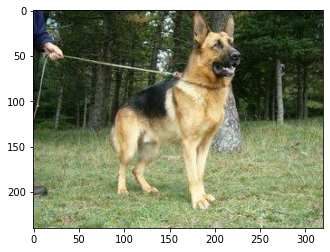

In [17]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])

CAMÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú ÌïôÏäµÌïú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Î≥ºÍªòÏöî

In [18]:
import os
cam_model_path = os.getenv('HOME')+'/aiffel/class_activation_map/cam_model2.h5'
cam_model = tf.keras.models.load_model(cam_model_path)

CAMÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú Í≤É     

(1) ÌäπÏÑ± Îßµ    
(2) ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†ÏùÑ ÏñªÍ∏∞ ÏúÑÌïú ÏÜåÌîÑÌä∏Îß•Ïä§ Î†àÏù¥Ïñ¥Ïùò Í∞ÄÏ§ëÏπò     
(3) ÏõêÌïòÎäî ÌÅ¥ÎûòÏä§Ïùò Ï∂úÎ†•Í∞í     

Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î™®Îç∏Ïù¥ Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ Î≥¥ÎäîÏßÄ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÍ∏∞ÏúÑÌï¥ ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú ÎÇòÏò® CAMÏùÑ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÏôÄ Í∞ôÍ≤å ÎßåÎì§Ïñ¥ Ìï®Íªò ÏãúÍ∞ÅÌôîÌïòÍ≤†ÏäµÎãàÎã§.     
Ïù¥Î•º Í≥†Î†§Ìï¥ÏÑú modelÍ≥º itemÏùÑ Î∞õÏïòÏùÑ Îïå ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏôÄ ÎèôÏùºÌïú ÌÅ¨Í∏∞Ïùò CAMÏùÑ Î∞òÌôòÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§!

In [19]:
# generate_cam() ÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ ÏïÑÎûòÏóêÏÑúÎäî conv_ouputsÏôÄ Í∞ôÏù¥ 
# ÌäπÏ†ï Î†àÏù¥Ïñ¥Ïùò Í≤∞Í≥ºÍ∞íÏùÑ outputÏúºÎ°ú Î∞õÍ∏∞ ÏúÑÌï¥ ÏÉàÎ°úÏö¥ Î™®Îç∏ÏùÑ Ï†ïÏùòÌïòÍ≥†, 
# feedforwardÎ•º Í±∞Ïπú ÌõÑ CAMÏùÑ Í≥ÑÏÇ∞ÌïòÎèÑÎ°ù Íµ¨ÌòÑÌïòÏòÄÏäµÎãàÎã§. 
# ÎßàÏßÄÎßâÏóêÎäî ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Ïóê ÎßûÏ∂∞ CAMÏùÑ resizeÌï¥ Ï£ºÏóàÏäµÎãàÎã§.
def generate_cam(model, item):
    item = copy.deepcopy(item)
    width = item['image'].shape[1]
    height = item['image'].shape[0]
    
    img_tensor, class_idx = normalize_and_resize_img(item)
    
    # ÌïôÏäµÌïú Î™®Îç∏ÏóêÏÑú ÏõêÌïòÎäî LayerÏùò outputÏùÑ ÏñªÍ∏∞ ÏúÑÌï¥ÏÑú Î™®Îç∏Ïùò inputÍ≥º outputÏùÑ ÏÉàÎ°≠Í≤å Ï†ïÏùòÌï¥Ï§çÎãàÎã§.
    # model.layers[-3].outputÏóêÏÑúÎäî Ïö∞Î¶¨Í∞Ä ÌïÑÏöîÎ°ú ÌïòÎäî GAP Ïù¥Ï†Ñ Convolution layerÏùò outputÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
    cam_model = tf.keras.models.Model([model.inputs], [model.layers[-3].output, model.output])
    conv_outputs, predictions = cam_model(tf.expand_dims(img_tensor, 0))
    
    conv_outputs = conv_outputs[0, :, :, :]
    class_weights = model.layers[-1].get_weights()[0] #ÎßàÏßÄÎßâ Î™®Îç∏Ïùò weight activationÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
    
    cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    for i, w in enumerate(class_weights[:, class_idx]):
        # W * f Î•º ÌÜµÌï¥ classÎ≥Ñ activation mapÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
        cam_image += w * conv_outputs[:, :, i]

    cam_image /= np.max(cam_image) # activation scoreÎ•º normalizeÌï©ÎãàÎã§.
    cam_image = cam_image.numpy()
    cam_image = cv2.resize(cam_image, (width, height)) # ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î°ú resizeÌï©ÎãàÎã§.
    return cam_image

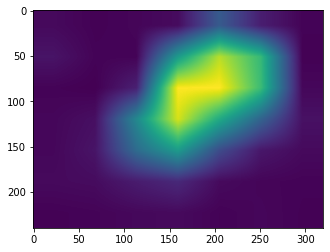

In [21]:
cam_image = generate_cam(cam_model, item)
plt.imshow(cam_image)
plt.show()

In [22]:
# CAM Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ Ìï©ÏπòÍ∏∞
# Îëê Ïù¥ÎØ∏ÏßÄÏùò Ìà¨Î™ÖÎèÑÎ•º Ï°∞Ï†ïÌïòÍ≥† ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏõêÎ≥∏Í≥º CAMÏùÑ Í≤πÏ≥ê Î≥¥Ïó¨Ï§å
def visualize_cam_on_image(src1, src2, alpha=0.5):
    beta = (1.0 - alpha)
    merged_image = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
    return merged_image

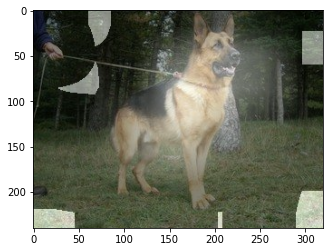

In [23]:
origin_image = item['image'].astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)

## Grad-CAM Íµ¨ÌòÑÌïòÍ∏∞     

--------------

Grad-CAMÏùÑ Ïù¥Ïö©Ìï¥ÏÑú CAMÏùÑ ÏñªÏñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§. Ï†ÅÏö© Î™®Îç∏ÏùÑ Ïú†Ïó∞ÌïòÍ≤å ÏÑ†ÌÉùÌï† Ïàò ÏûàÎäî Grad-CAMÏùò ÌäπÏÑ± ÏÉÅ ÏúÑÏóêÏÑú ÎßåÎì§ÏóàÎçò Î™®Îç∏ÏùÑ Îã§Ïãú ÌôúÏö©Ìï¥ÎèÑ Í¥úÏ∞ÆÍ∏∞ ÎïåÎ¨∏Ïóê Í¥ÄÏ∞∞ ÎåÄÏÉÅ Î™®Îç∏ÏùÄ cam_modelÏùÑ Í∑∏ÎåÄÎ°ú ÌôúÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÏ£†!

67


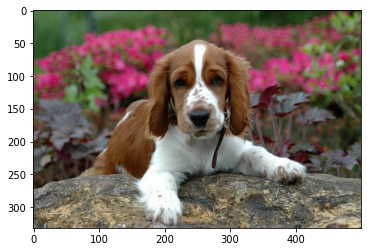

In [24]:
# ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄÎ•º ÎΩëÏïÑÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

### grad_cam
* Í¥ÄÏ∞∞ÏùÑ ÏõêÌïòÎäî Î†àÏù¥Ïñ¥ÏôÄ Ï†ïÎãµ ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÏòàÏ∏°Í∞í ÏÇ¨Ïù¥Ïùò Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Íµ¨ÌïòÍ≥†, Ïó¨Í∏∞Ïóê GAP Ïó∞ÏÇ∞ÏùÑ Ï†ÅÏö©Ìï®ÏúºÎ°úÏç® Í¥ÄÏ∞∞ ÎåÄÏÉÅÏù¥ ÎêòÎäî Î†àÏù¥Ïñ¥Ïùò Ï±ÑÎÑêÎ≥Ñ Í∞ÄÏ§ëÏπòÎ•º Íµ¨Ìï©ÎãàÎã§.     

* ÏµúÏ¢Ö CAM Ïù¥ÎØ∏ÏßÄÎ•º Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Î†àÏù¥Ïñ¥Ïùò Ï±ÑÎÑêÎ≥Ñ Í∞ÄÏ§ëÏπò(weights)ÏôÄ Î†àÏù¥Ïñ¥ÏóêÏÑú ÎÇòÏò® Ï±ÑÎÑêÎ≥Ñ ÌäπÏÑ± ÎßµÏùÑ Í∞ÄÏ§ëÌï©Ìï¥Ï£ºÏñ¥ cam_imageÎ•º ÏñªÍ≤å Îê©ÎãàÎã§.

**Grad-CAM**ÏùÄ Ïù¥Î≤àÏóêÎäî Ïñ¥Îñ§ Î†àÏù¥Ïñ¥Îì† **CAM Ïù¥ÎØ∏ÏßÄÎ•º ÎΩëÏïÑÎÇº Ïàò ÏûàÏúºÎØÄÎ°ú**, Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ÏùÑ ÏõêÌïòÎäî Í¥ÄÏ∞∞ ÎåÄÏÉÅ Î†àÏù¥Ïñ¥ activation_layerÎ•º ÎΩëÏïÑÏÑú Ïì∏ Ïàò ÏûàÎèÑÎ°ù activation_layerÏùò Ïù¥Î¶ÑÏùÑ Î∞õÍ≥† Ïù¥Î•º ÌôúÏö©Ìï¥ÏïºÌï©ÎãàÎã§.

In [25]:
def generate_grad_cam(model, activation_layer, item):
    item = copy.deepcopy(item)
    width = item['image'].shape[1]
    height = item['image'].shape[0]
    img_tensor, class_idx = normalize_and_resize_img(item)
    
    # Grad camÏóêÏÑúÎèÑ camÍ≥º Í∞ôÏù¥ ÌäπÏ†ï Î†àÏù¥Ïñ¥Ïùò outputÏùÑ ÌïÑÏöîÎ°ú ÌïòÎØÄÎ°ú Î™®Îç∏Ïùò inputÍ≥º outputÏùÑ ÏÉàÎ°≠Í≤å Ï†ïÏùòÌï©ÎãàÎã§.
    # Ïù¥Îïå ÏõêÌïòÎäî Î†àÏù¥Ïñ¥Í∞Ä Îã§Î•º Ïàò ÏûàÏúºÎãà Ìï¥Îãπ Î†àÏù¥Ïñ¥Ïùò Ïù¥Î¶ÑÏúºÎ°ú Ï∞æÏùÄ ÌõÑ outputÏúºÎ°ú Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(activation_layer).output, model.output])
    
    # GradientÎ•º ÏñªÍ∏∞ ÏúÑÌï¥ tapeÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    with tf.GradientTape() as tape:
        conv_output, pred = grad_model(tf.expand_dims(img_tensor, 0))
    
        loss = pred[:, class_idx] # ÏõêÌïòÎäî class(Ïó¨Í∏∞ÏÑúÎäî Ï†ïÎãµÏúºÎ°ú ÌôúÏö©) ÏòàÏ∏°Í∞íÏùÑ ÏñªÏäµÎãàÎã§.
        output = conv_output[0] # ÏõêÌïòÎäî layerÏùò outputÏùÑ ÏñªÏäµÎãàÎã§.
        grad_val = tape.gradient(loss, conv_output)[0] # ÏòàÏ∏°Í∞íÏóê Îî∞Î•∏ LayerÏùò gradientÎ•º ÏñªÏäµÎãàÎã§.

    weights = np.mean(grad_val, axis=(0, 1)) # gradientÏùò GAPÏúºÎ°ú classÎ≥Ñ weightÎ•º Íµ¨Ìï©ÎãàÎã§.
    grad_cam_image = np.zeros(dtype=np.float32, shape=conv_output.shape[0:2])
    for k, w in enumerate(weights):
        # Í∞Å classÎ≥Ñ weightÏôÄ Ìï¥Îãπ layerÏùò outputÏùÑ Í≥±Ìï¥ class activation mapÏùÑ ÏñªÏäµÎãàÎã§.
        grad_cam_image += w * output[:, :, k]
        
    grad_cam_image /= np.max(grad_cam_image)
    grad_cam_image = grad_cam_image.numpy()
    grad_cam_image = cv2.resize(grad_cam_image, (width, height))
    return grad_cam_image

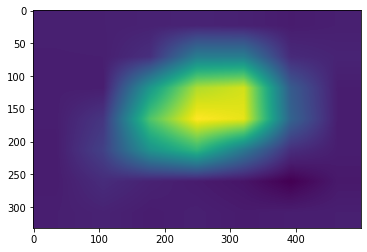

In [26]:
grad_cam_image = generate_grad_cam(cam_model, 'conv5_block3_out', item)
plt.imshow(grad_cam_image)
plt.show()

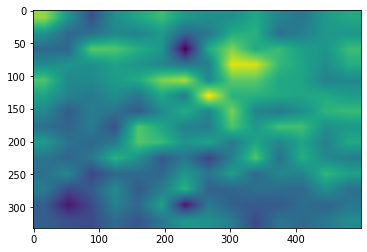

In [27]:
grad_cam_image = generate_grad_cam(cam_model, 'conv4_block3_out', item)
plt.imshow(grad_cam_image)
plt.show()

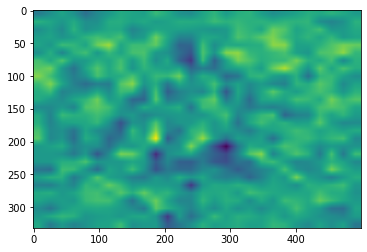

In [28]:
grad_cam_image = generate_grad_cam(cam_model, 'conv3_block3_out', item)
plt.imshow(grad_cam_image)
plt.show()

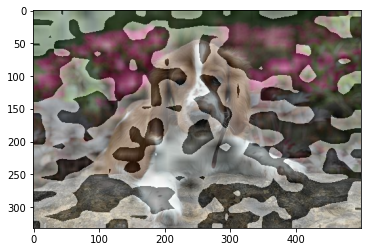

In [29]:
origin_image = item['image'].astype(np.uint8)
grad_cam_image_3channel = np.stack([grad_cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(grad_cam_image_3channel, origin_image)
plt.imshow(blended_image)

## Detection with CAM

## Î∞îÏö¥Îî© Î∞ïÏä§ Íµ¨ÌïòÍ∏∞

### bbox from CAM

67


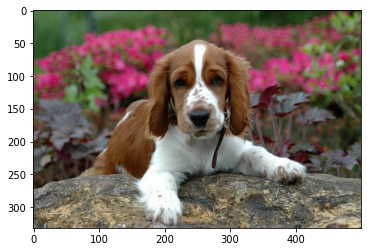

In [30]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

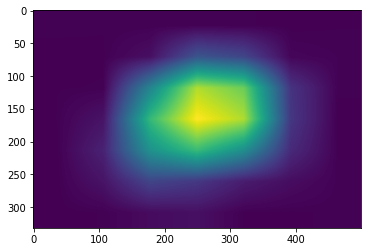

In [31]:
cam_image = generate_cam(cam_model, item)
plt.imshow(cam_image)

In [32]:
def get_bbox(cam_image, score_thresh=0.05):
    low_indicies = cam_image <= score_thresh  # Ïó≠ÏπòÍ∞í Ïù¥ÌïòÏùò Î∞îÏö¥Îî© Î∞ïÏä§Îäî ÏóÜÏï±ÎãàÎã§.
    cam_image[low_indicies] = 0
    cam_image = (cam_image*255).astype(np.uint8)
    
    contours,_ = cv2.findContours(cam_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # ÏÇ¨Í∞ÅÌòï Ï∞æÍ∏∞
    cnt = contours[0]
    rotated_rect = cv2.minAreaRect(cnt)  # ÌöåÏ†ÑÎêú Î∞îÏö¥Îî© Î∞ïÏä§ ÏñªÍ∏∞
    rect = cv2.boxPoints(rotated_rect)  # Íº≠ÏßÄÏ†êÏúºÎ°ú Î≥ÄÌôò
    rect = np.int0(rect)  # int ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôò
    return rect

In [33]:
image = copy.deepcopy(item['image'])
rect = get_bbox(cam_image)
rect

array([[ 73, 297],
       [ 81,  26],
       [443,  37],
       [435, 308]])

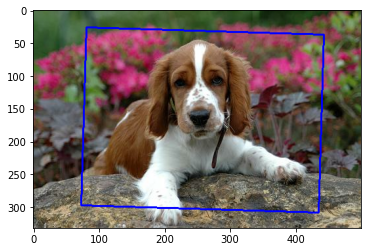

In [34]:
image = cv2.drawContours(image,[rect],0,(0,0,255),2)
plt.imshow(image)

### bbox from Grad-CAM

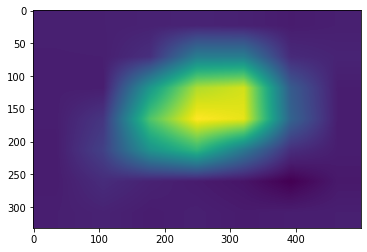

In [35]:
grad_cam_image = generate_grad_cam(cam_model, 'conv5_block3_out', item)
plt.imshow(grad_cam_image)

In [36]:
image = copy.deepcopy(item['image'])
grad_rect = get_bbox(grad_cam_image)
grad_rect

array([[ 66,  29],
       [447,  26],
       [448, 254],
       [ 68, 257]])

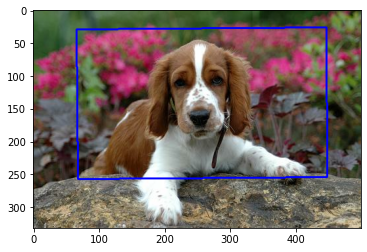

In [37]:
image = cv2.drawContours(image,[grad_rect],0,(0,0,255),2)
plt.imshow(image)

## IoU(Intersection Over Union) Íµ¨ÌïòÍ∏∞    


--------

IoU(Intersection over Union)Îäî Îëê ÏòÅÏó≠Ïùò ÍµêÏßëÌï©Ïù∏ intersection ÏòÅÏó≠Ïùò ÎÑìÏù¥Î•º Îëê ÏòÅÏó≠Ïùò Ìï©ÏßëÌï©Ïù∏ union ÏòÅÏó≠ÏúºÎ°ú ÎÇòÎàÑÏñ¥Ï§Ä Í∞í

In [38]:
# ÏúÑÏóêÏÑú Íµ¨Ìïú rectÎ•º minmax bbox ÌòïÌÉúÎ°ú ÏπòÌôòÌïòÎäî Ìï®Ïàò
# rectÏùò Ï¢åÌëúÎäî (x, y) ÌòïÌÉúÎ°ú, bboxÎäî (y_min, x_min, y_max, x_max)Ïùò normalized ÌòïÌÉúÎ°ú Ï£ºÏñ¥ÏßëÎãàÎã§. 
def rect_to_minmax(rect, image):
    bbox = [
        rect[:,1].min()/float(image.shape[0]),  #bounding boxÏùò y_min
        rect[:,0].min()/float(image.shape[1]),  #bounding boxÏùò x_min
        rect[:,1].max()/float(image.shape[0]),  #bounding boxÏùò y_max
        rect[:,0].max()/float(image.shape[1])   #bounding boxÏùò x_max
    ]
    return bbox

In [40]:
pred_bbox = rect_to_minmax(rect, item['image'])
pred_bbox

[0.0783132530120482, 0.146, 0.927710843373494, 0.886]

In [41]:
item['objects']['bbox']

array([[0.13554217, 0.146     , 0.9879518 , 0.826     ]], dtype=float32)

In [42]:
# Grad-CAMÏùò bbox
grad_pred_bbox = rect_to_minmax(grad_rect, item['image'])
grad_pred_bbox

[0.0783132530120482, 0.132, 0.7740963855421686, 0.896]

In [43]:
def get_iou(boxA, boxB):
    y_min = max(boxA[0], boxB[0])
    x_min= max(boxA[1], boxB[1])
    y_max = min(boxA[2], boxB[2])
    x_max = min(boxA[3], boxB[3])
    
    interArea = max(0, x_max - x_min) * max(0, y_max - y_min)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

In [46]:
# CAMÏúºÎ°ú ÏñªÏùÄ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄ Ï†ïÎãµ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄÏùò IoU
get_iou(pred_bbox, item['objects']['bbox'][0])

0.8045707738491713

In [47]:
# Grad-CAMÏúºÎ°ú ÏñªÏùÄ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄ Ï†ïÎãµ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄÏùò IoU
get_iou(grad_pred_bbox, item['objects']['bbox'][0])

0.6413837821769828

||CAM|Grad-CAM|
|:---:|:-------------------------------------------:|:--------------------------------------:|
|image|<img width="300" alt="cam" src="https://user-images.githubusercontent.com/63396019/136975291-8477ff66-6d48-4ad3-8a1b-95e20c2ded80.png">|<img width="300" alt="·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2021-10-12 ·Ñã·Ö©·Ñí·ÖÆ 11 13 25" src="https://user-images.githubusercontent.com/63396019/136975377-60998d9a-1e99-46ea-9fee-c443c8f824e9.png">|
|bbox|<img width="300" alt="camcam" src="https://user-images.githubusercontent.com/63396019/136976721-d9cd62e3-e9ad-4c3c-80fa-a14afda2559e.png">|<img width="300" alt="·Ñâ·Ö≥·Ñè·Ö≥·ÑÖ·Öµ·Ü´·Ñâ·Ö£·Ü∫ 2021-10-12 ·Ñã·Ö©·Ñí·ÖÆ 11 13 29" src="https://user-images.githubusercontent.com/63396019/136975571-cc264e7d-3dde-45b6-975a-0e75c20dc83e.png">|
|IoU|0.80|0.64|

‚ñ∂Ô∏è ÏúÑÏóê Í∞ïÏïÑÏßÄ ÏÇ¨ÏßÑÏùÑ Î≥¥Î©¥ CAMÏùÄ ÏñºÍµ¥ÎøêÎßåÏïÑÎãàÎùº Îëê Î∞úÍπåÏßÄ ÌäπÏßïÏùÑ Ï∂îÏ∂úÌñàÏßÄÎßå Grad-CAMÏùÄ Ï£ºÎ°ú ÏñºÍµ¥Î∂ÄÎ∂ÑÎßå ÌäπÏßïÏùÑ Ï∂îÏ∂úÌïòÍ≥† ÏûàÎäîÍ≤å Î≥¥Ïù¥Ï£†! Îî∞ÎùºÏÑú CAMÏù¥ Grad-CAMÎ≥¥Îã§ Ï°∞Í∏à Îçî ÎÑìÏùÄ Î∂ÄÎ∂ÑÏùÑ ÏßëÏ§ëÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.       


‚ñ∂Ô∏è IoUÎèÑ CAMÏù¥ Ï¢Ä Îçî ÎÜíÍ≤å ÎÇòÏò® Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

# üåü Î£®Î∏åÎ¶≠

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:-----------|:----------------|
|1. CAMÏùÑ ÏñªÍ∏∞ ÏúÑÌïú Í∏∞Î≥∏Î™®Îç∏Ïùò Íµ¨ÏÑ±Í≥º ÌïôÏäµÏù¥ Ï†ïÏÉÅ ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?|ResNet50 + GAP + DenseLayer Í≤∞Ìï©Îêú CAM Î™®Îç∏Ïùò ÌïôÏäµÍ≥ºÏ†ïÏù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÏòÄÎã§.|
|2. Î∂ÑÎ•òÍ∑ºÍ±∞Î•º ÏÑ§Î™Ö Í∞ÄÎä•Ìïú Class activation mapÏùÑ ÏñªÏùÑ Ïàò ÏûàÎäîÍ∞Ä?|CAM Î∞©ÏãùÍ≥º Grad-CAM Î∞©ÏãùÏùò class activation mapÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏñªÏñ¥ÏßÄÎ©∞, ÏãúÍ∞ÅÌôîÌïòÏòÄÏùÑ Îïå Ìï¥Îãπ objectÏùò Ï£ºÏöî ÌäπÏßï ÏúÑÏπòÎ•º Ïûò Î∞òÏòÅÌïúÎã§.|
|3. Ïù∏ÏãùÍ≤∞Í≥ºÏùò ÏãúÍ∞ÅÌôî Î∞è ÏÑ±Îä• Î∂ÑÏÑùÏùÑ Ï†ÅÏ†àÌûà ÏàòÌñâÌïòÏòÄÎäîÍ∞Ä?|CAMÍ≥º Grad-CAM Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÌï©ÏÑ±, Î∞îÏö¥Îî©Î∞ïÏä§, IoU Í≥ÑÏÇ∞ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ CAMÍ≥º Grad-CAMÏùò object localization ÏÑ±Îä•Ïù¥ ÎπÑÍµêÎ∂ÑÏÑùÎêòÏóàÎã§.|